In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Starter_code/Resources/hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\bghos\AppData\Local\Temp\ipykernel_32216\930725367.py:5: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [12]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
latest_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
latest_date

('2017-08-23',)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
latest_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
latest_date


('2017-08-23',)

In [16]:
# Calculate the date one year from the last date in data set.
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)


Query Date: 2016-08-22


In [17]:
# Starting from the most recent data point in the database.     
year_prcp=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago_date)
                  .group_by(Measurement.date)
                  .all())
year_prcp


[('2016-08-23', 45.5),
 ('2016-08-24', 57.9),
 ('2016-08-25', 5.3),
 ('2016-08-26', 1.0),
 ('2016-08-27', 4.6),
 ('2016-08-28', 52.6),
 ('2016-08-29', 22.9),
 ('2016-08-30', 1.3),
 ('2016-08-31', 62.5),
 ('2016-09-01', 0.5),
 ('2016-09-02', 4.8),
 ('2016-09-03', 25.4),
 ('2016-09-04', 18.8),
 ('2016-09-05', 4.6),
 ('2016-09-06', 25.4),
 ('2016-09-07', 34.3),
 ('2016-09-08', 5.6),
 ('2016-09-09', 8.9),
 ('2016-09-10', 29.5),
 ('2016-09-11', 15.2),
 ('2016-09-12', 26.4),
 ('2016-09-13', 30.5),
 ('2016-09-14', 170.2),
 ('2016-09-15', 85.1),
 ('2016-09-16', 15.5),
 ('2016-09-17', 9.1),
 ('2016-09-18', 10.7),
 ('2016-09-19', 6.4),
 ('2016-09-20', 10.9),
 ('2016-09-21', 25.9),
 ('2016-09-22', 19.0),
 ('2016-09-23', 23.9),
 ('2016-09-24', 6.9),
 ('2016-09-25', 1.0),
 ('2016-09-26', 25.9),
 ('2016-09-27', 25.4),
 ('2016-09-28', 2.0),
 ('2016-09-29', 37.8),
 ('2016-09-30', 9.7),
 ('2016-10-01', 25.9),
 ('2016-10-02', 15.5),
 ('2016-10-03', 11.7),
 ('2016-10-04', 87.9),
 ('2016-10-05', 20.6),
 (

In [18]:
# Perform a query to retrieve the data and precipitation scores
prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df.head(10)


,prcp
date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
2016-08-28,52.6
2016-08-29,22.9
2016-08-30,1.3
2016-08-31,62.5


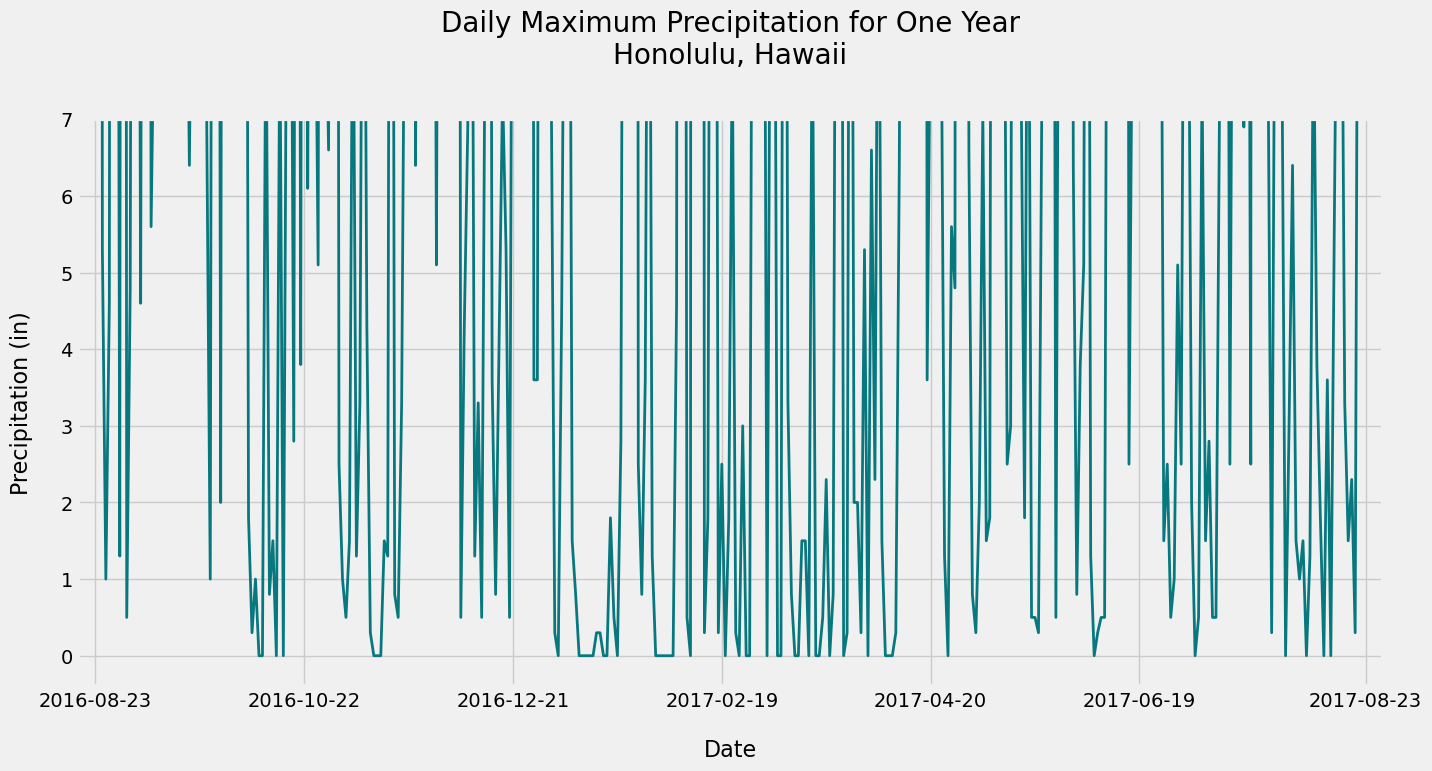

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)

prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:deep aqua')

plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Maximum Precipitation for One Year\nHonolulu, Hawaii',fontsize=20,pad=40)

plt.show()

In [20]:
# Sort the dataframe by date
prcp_df.sort_values('date')


,prcp
date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
...,...
2017-08-19,2.3
2017-08-20,0.3
2017-08-21,14.2


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station).count()
print(f'There are {total_stations} stations.')

There are 9 stations.


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_st=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_st

most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,12.2,29.4,22.035823


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
year_tobs

[('2016-08-23', 25.0),
 ('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-

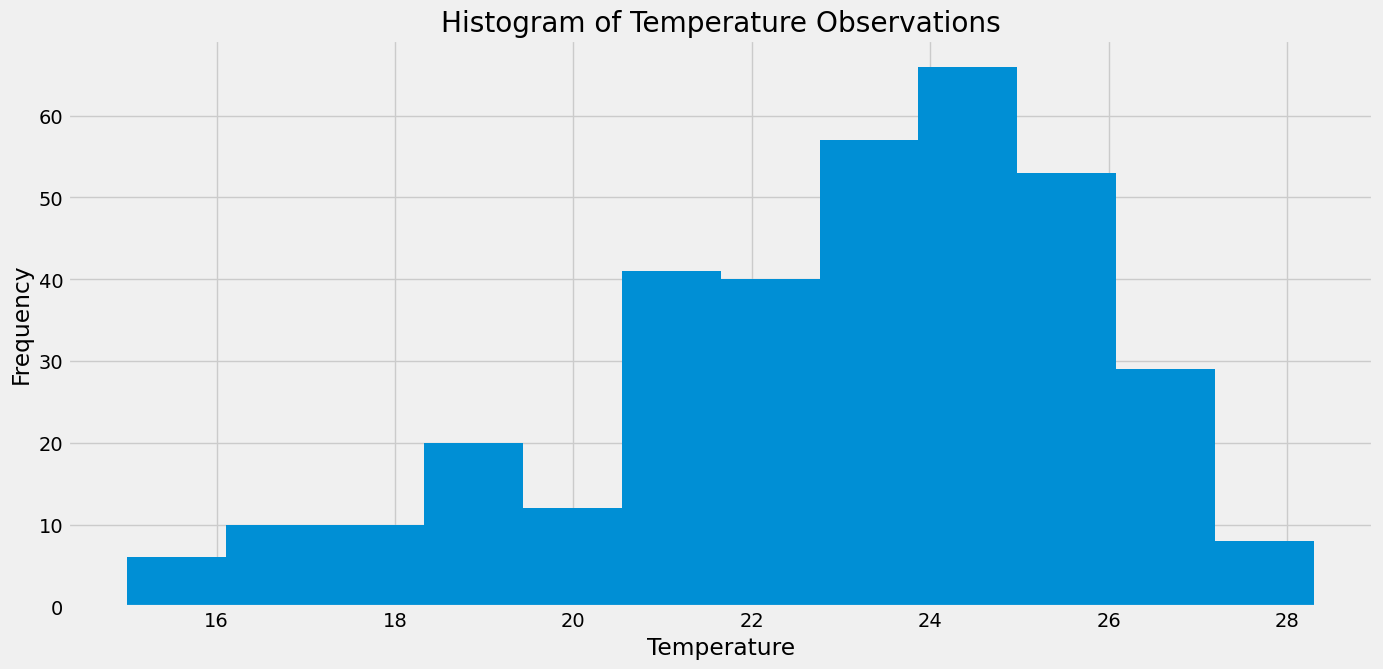

In [23]:
import matplotlib.pyplot as plt

# Extract the TOBS values from year_tobs
tobs_values = [tobs for date, tobs in year_tobs]

# Create a histogram of the TOBS values
plt.hist(tobs_values, bins=12)

# Add labels and title to the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Observations')

# Display the plot
plt.show()

# Close Session

In [20]:
# Close Session
session.close()